<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/2024_BPCA_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read in these files: /content/2024_holidayfarmfire.xlsx, /content/BPCA6_standards.csv, /content/sample_data, /content/BPCA_HPLC_LF.csv, /content/C_Mg_ha.csv,
# /content/Postfire Soils BPCA - LF_subset.csv, /content/cwd_rate_table.csv, /content/image.png, /content/lines.gpkg, /content/points.gpkg, /content/spatial_cwd.gpkg,
# /content/transect_data.gpkg

In [ ]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [ ]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9629416852f3f241e173851aaf99b509&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbTRTQk9peXBaM3V1MTQzTUJBNUxGd3ItMHAtRUlkZGlDREFUZVdUbDRWUGE5d1J2QjRGU3JDS3dNR1p5NWxSZyIsInN0YXRlIjoiOTYyOTQxNjg1MmYzZjI0MWUxNzM4NTFhYWY5OWI1MDkifQ==


In [ ]:
# bpca_dt <- fread('/content/BPCA_HPLC_LF.csv')
# standards_dt <- fread('/content/BPCA6_standards.csv')
LF_stoic_dt_old <- fread('/content/Postfire Soils BPCA - LF_subset.csv')

In [ ]:
# https://docs.google.com/spreadsheets/d/1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y/edit?usp=sharing

In [ ]:
# Hawaii GEDI data ## even though it's not HI GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y'), path =  '/content/2024_holidayfarmfire.xlsx', overwrite = FALSE)
# gedi_sf <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg')

File downloaded:

• 2024_holidayfarmfire <id: 1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y>

Saved locally as:

• /content/2024_holidayfarmfire.xlsx



In [ ]:
# https://drive.google.com/file/d/1tVMe4VeUT06QLF_iOirdcLZ_4aT-cQCg/view?usp=drive_link
drive_download(file = as_id('1tVMe4VeUT06QLF_iOirdcLZ_4aT-cQCg'), path =  '/content/cwd_rate_table.csv', overwrite = FALSE)

File downloaded:

• cwd_rate_table.csv <id: 1tVMe4VeUT06QLF_iOirdcLZ_4aT-cQCg>

Saved locally as:

• /content/cwd_rate_table.csv



In [ ]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [ ]:
SheetNames<-getSheetNames('/content/2024_holidayfarmfire.xlsx')
print(SheetNames)

data_list <- SheetNames %>%
             lapply(function(x){
                #Read the i'th sheet
             openxlsx::read.xlsx('/content/2024_holidayfarmfire.xlsx', x) %>% data.table
             })

names(data_list) <- SheetNames

[1] "Site Locations"         "Soil Samples"           "CWD"                   
[4] "Decay and burn classes" "Frac BPCA"              "BPCA Standards"        


In [ ]:
standards_2_dt <- data_list[['BPCA Standards']][Treatment == 'standard']

In [ ]:
standards_2_dt$stock_concentration_mg_per_ml <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)*(2/3)
# standards_2_dt$stock_concentration_mg_per_ml_alt <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)
standards_2_dt$PA_240_nm  <- standards_2_dt$`240_nm_PA`
standards_2_dt$PA_216_nm  <- standards_2_dt$`216_nm_PA`

In [ ]:
# standards_dt %>% head
# lm('stock_concentration_mg_per_ml~PA_216_nm',standards_dt) %>% summary
conc_240_lm <- lm('stock_concentration_mg_per_ml~PA_240_nm',standards_2_dt)
conc_216_lm <- lm('stock_concentration_mg_per_ml~PA_216_nm',standards_2_dt)
conc_240_lm %>% summary
conc_216_lm %>% summary


Call:
lm(formula = "stock_concentration_mg_per_ml~PA_240_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.010089  0.010557  0.009807  0.005208 -0.002146 -0.040517  0.007002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.106e-02  8.600e-03  -1.285    0.255    
PA_240_nm    3.858e-08  1.288e-09  29.960 7.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02016 on 5 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9934 
F-statistic: 897.6 on 1 and 5 DF,  p-value: 7.77e-07



Call:
lm(formula = "stock_concentration_mg_per_ml~PA_216_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.006833  0.007300  0.006870  0.003657 -0.002204 -0.026349  0.003894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.507e-03  5.616e-03  -1.515     0.19    
PA_216_nm    1.731e-08  3.785e-10  45.731 9.44e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01323 on 5 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9971 
F-statistic:  2091 on 1 and 5 DF,  p-value: 9.441e-08


In [ ]:
bpca_dt <- data_list[['BPCA Standards']]

bpca_dt$PA_240_nm  <- bpca_dt$`240_nm_PA`
bpca_dt$PA_216_nm  <- bpca_dt$`216_nm_PA`

In [ ]:
bpca_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
bpca_dt[Treatment!='standard',conc_216 := (conc_216^2)/10]

In [ ]:
 bpca_dt[BPCA_ID == 'R65 V22']$PA_240_nm <- NA #Has a reading of >1 in 240 (1.2)
 bpca_dt[BPCA_ID == 'R65 V22']

BPCA_ID,Sample_ID,Treatment,Fraction,Depth_upper,Depth_lower,Site,Burn_severity,240_nm_PA,216_nm_PA,notes,PA_240_nm,PA_216_nm,conc_240,conc_216
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
R65 V22,CL2 10-20 LF,control,LF,10,20,CL2,control,32555238,65637752,NA,NA,65637752,1.244939,0.1271416


[1] 0.9912033

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


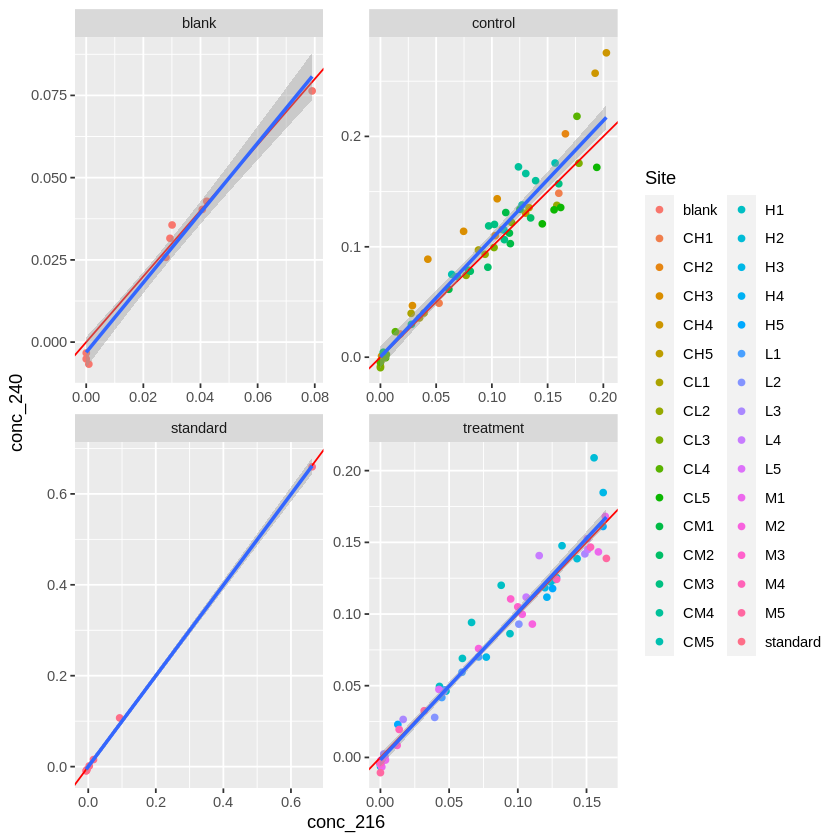

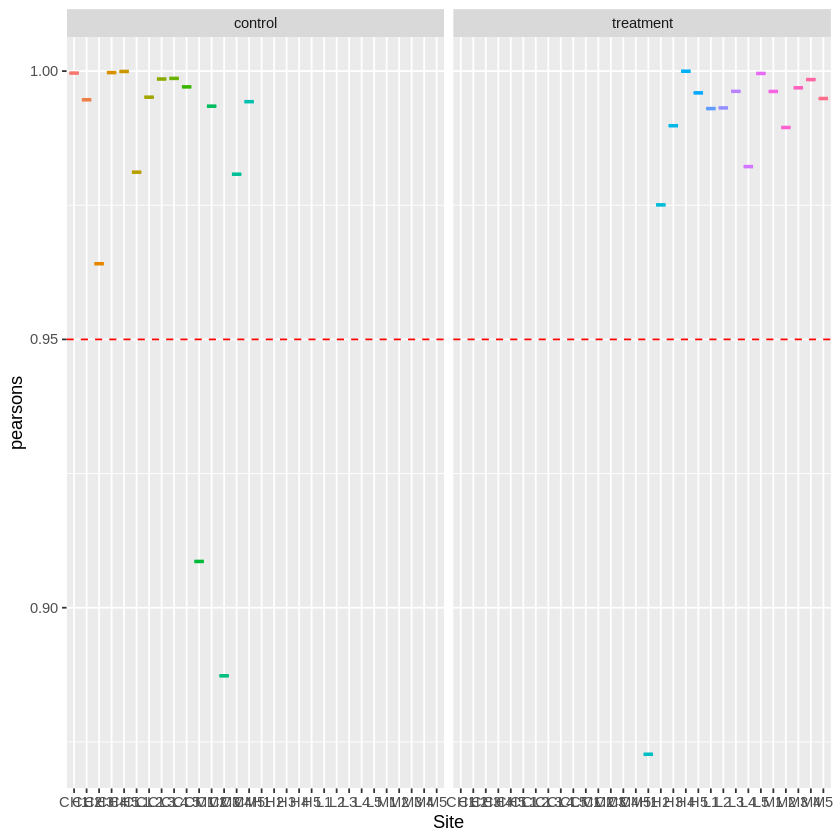

In [ ]:
bpca_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
bpca_dt[Treatment=='standard',Site:='standard']
bpca_dt[Treatment=='blank',Site:='blank']
bpca_dt[Treatment!='standard',conc_216 := (conc_216^2)/10]
bpca_dt[,pearsons:=cor(conc_240[!is.na(conc_240) & !is.na(conc_216)],conc_216[!is.na(conc_240) & !is.na(conc_216)]),by = .(Site)]

# bpca_dt[pearsons < .95][,list(pearsons = pearsons[1]),by=Site]
bpca_dt[Treatment=='blank']$pearsons %>% mean
bpca_dt[ ] %>%
  ggplot(aes(x=conc_216 ,y=conc_240)) +
  geom_point(aes(color=Site))+
  geom_abline(color='red')+
  geom_smooth(method='lm')+
  # geom_point(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+

  # geom_smooth(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+
  facet_wrap(Treatment~.,scales = 'free')

bpca_dt[Treatment %in% c('control','treatment')  ]  %>%
  ggplot(aes(y=pearsons,x=Site)) +
  geom_boxplot(aes(color=Site))+
  theme(legend.position = "none")  +
  geom_hline(yintercept = .95,color='red',linetype='dashed')+
  # geom_abline(color='red')+
  # geom_smooth(method='lm')+
  facet_wrap(Treatment~.)

In [ ]:
bpca_dt[,Depth := paste0(Depth_upper,'-',Depth_lower) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

bpca_dt[is.na(Depth),Depth:='blank']

bpca_dt[,conc_mean:= mean(c(conc_240,conc_216),na.rm=T),by=1:nrow(bpca_dt)]

In [ ]:
LF_stoic_dt <- data_list[["Frac BPCA"]]
LF_stoic_dt[,Depth := paste0(depth_upper_cm %>% as.numeric,'-',depth_lower_cm %>% as.numeric) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

Warning message in depth_upper_cm %>% as.numeric:
“NAs introduced by coercion”
Warning message in depth_lower_cm %>% as.numeric:
“NAs introduced by coercion”


In [ ]:
LF_stoic_dt$PA_240_nm  <- LF_stoic_dt$`240_nm_PA`
LF_stoic_dt$PA_216_nm  <- LF_stoic_dt$`216_nm_PA`


LF_stoic_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
LF_stoic_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
LF_stoic_dt[ ,conc_216 := (conc_216^2)/10]

LF_stoic_dt[,blank_conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=blank1_240_nm_PA))]
LF_stoic_dt[,blank_conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (blank1_216_nm_PA )))]
LF_stoic_dt[ ,blank_conc_216 := (blank_conc_216^2)/10]

In [ ]:
LF_stoic_dt[conc_240>.8]$conc_240 <- NA

In [ ]:

LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]
LF_stoic_dt[,conc_avg := mean(c(conc_216,conc_240),na.rm=T),by=1:nrow(LF_stoic_dt)]

In [ ]:
join_dt <- LF_stoic_dt_old[,.(Site,Depth,Fract,bpca_starting_mass_mg)]

In [ ]:
head(join_dt)

Site,Depth,Fract,bpca_starting_mass_mg
<chr>,<chr>,<chr>,<dbl>
CM1,0-5,LF,3.927
M1,5-10,LF,3.587
M2,10-20,LF,3.695
CM1,5-10,LF,3.677
CL2,10-20,LF,3.419
H2,20-30,LF,3.778


In [ ]:
join_dt %>% names

setnames(join_dt, old = c("Site", "Fract"), new = c("site", "fraction"))


[1] "Site"                  "Depth"                 "Fract"                
[4] "bpca_starting_mass_mg"

In [ ]:
join_dt %>% names

[1] "site"                  "Depth"                 "fraction"             
[4] "bpca_starting_mass_mg"

In [ ]:
LF_stoic_dt <- merge(LF_stoic_dt,join_dt,by=c('site','Depth','fraction'),all = T)

In [ ]:
LF_stoic_dt %>% names

[1] "site"                           "Depth"                         
 [3] "fraction"                       "burn_severity"                 
 [5] "depth_upper_cm"                 "depth_lower_cm"                
 [7] "fractionation_mass_recovered_g" "starting_fract_mass_soil_g"    
 [9] "mass_proportion_recovered"      "recovery"                      
[11] "C_perc"                         "N_perc"                        
[13] "rerun"                          "frac_notes"                    
[15] "accept"                         "BPCA_Run"                      
[17] "BPCA_Run2"                      "240_nm_PA"                     
[19] "216_nm_PA"                      "BPCA_rep1_notes"               
[21] "240_nm_PA_dupe"                 "216_nm_PA_dupe"                
[23] "BPCA_rep2_notes"                "blank1_240_nm_PA"              
[25] "blank1_216_nm_PA"               "blank2_240_nm_PA"              
[27] "blank2_216_nm_PA"               "PA_240_nm"                     
[29] "PA_216_nm"                      "conc_240"                      
[31] "conc_216"                       "blank_conc_240"                
[33] "blank_conc_216"                 "conc_avg"                      
[35] "bpca_starting_mass_mg"

In [ ]:
cwd_rate_table

Site,decayed_mass_kg,total_input,burn_decayed_mass_kg,wood_input_rate,wood_departure_rate,wood_accumulation_rate,years_to_capacity,years_to_recovery
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH4,3.5924356,9.0204632,3.59243563,0.37116231,0.139072825,0.232089488,15.478666,0.00000000
L3,0.2771711,0.3897868,0.16988331,0.04622142,0.008705993,0.037515431,7.388188,2.85983018
CM1,1.0858740,2.2062944,0.95648166,0.10224041,0.039962405,0.062278004,17.435916,2.07765769
CL4,5.2776189,11.5374375,5.27761889,0.61277011,0.192103369,0.420666737,12.545843,0.00000000
CL2,8.1390410,17.2696952,8.13904103,0.64365740,0.294378477,0.349278921,23.302411,0.00000000
L2,1.6787543,2.8223018,1.20229137,0.22214435,0.055610639,0.166533709,10.080568,2.86106022
CH3,0.3756664,0.4363803,0.37566637,0.09115049,0.010590500,0.080559991,4.663188,0.00000000
CH1,18.9186152,43.8902782,18.91861523,1.35519156,0.600391335,0.754800227,25.064401,0.00000000
H1,0.4541378,0.8209708,0.04541378,0.04041332,0.016367473,0.024045848,18.886331,16.99769796


In [ ]:

# LF_stoic_dt
# bpca_dt
# cwd_rate_table

write.csv (LF_stoic_dt ,'/content/LF_stoic_dt2.csv')

In [ ]:
# Write data to Google Drive
# drive_update(as_googlesheet('/content/LF_stoic_dt2.csv', name = "LF_stoic_dt"), file_id = as_id('1ojkBi2eX34ZiV8faDqR4bTWOauE23RH6'))
drive_upload('/content/LF_stoic_dt2.csv', name = "LF_stoic_dt", overwrite = TRUE,  path = '1nvms8aJV7eCdDtNCo0XdFZnNIv6-RbrC')
# drive_update(as_drive_media(LF_stoic_dt), file_id = '1ojkBi2eX34ZiV8faDqR4bTWOauE23RH6')
# https://drive.google.com/drive/folders/1nvms8aJV7eCdDtNCo0XdFZnNIv6-RbrC?usp=drive_link

ERROR: [1m[33mError[39m in `as_parent()`:[22m
[1m[22m[33m![39m Parent specified via `path` is invalid:
[31m✖[39m Does not exist.
